Import relevant libraries

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [251]:
import os
os.getcwd()

'/Users/jensengbe'

In [252]:
df = pd.read_csv('/Users/jensengbe/Desktop/School/Predictive Modeling/Linear Regression Modeling/Data Files/d9rkejv84kd9rk30fi2l/churn_clean.csv')

Preview dataset

In [254]:
df.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,114.950905,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,162.482694,508.763791,2,2,2,2,5,2,3,3


Print list of columns

In [258]:
print(df.columns.tolist())

['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Drop columns not useful for modeling

In [260]:
df.drop(columns=['Customer_id'], inplace=True)

Check for missing values

In [263]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

Missing values per column:
 InternetService    2129
dtype: int64


Handling missing values

In [265]:
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])

Drop if null

In [267]:
df = df.dropna()

Drop rows with missing values

In [269]:
df.dropna(inplace=True)

Remove duplicates

In [273]:
df = df.drop_duplicates()

Data Transformation Starts Here

Identify categorical variables in dataset

In [281]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:\n", categorical_cols)

Categorical columns to encode:
 ['Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


Check for multicollinearity using correlation matrix

Select only the important continuous variables and one-hot encoded service features

In [284]:
selected_cols = ['Tenure', 'MonthlyCharge']

Convert categorical variables into numeric dummy variables

In [286]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Add selected service feature dummies if exist in encoded dataset

In [288]:
service_features = [col for col in df_encoded.columns if 'Contract' in col or 'TechSupport' in col or 'InternetService' in col]

Combine into final list

In [291]:
final_cols = selected_cols + service_features

Create correlation matrix

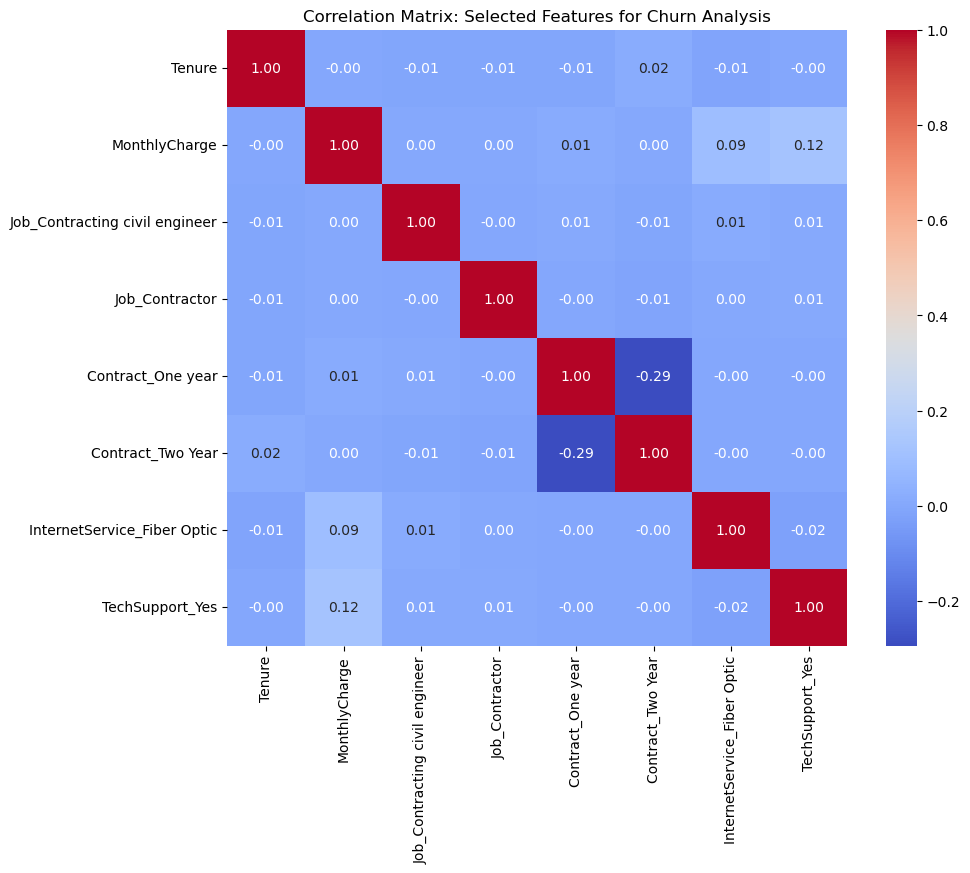

In [294]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[final_cols].corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Selected Features for Churn Analysis")
plt.show()

Check for outliers

Import relevant library

In [298]:
from scipy.stats import zscore

Select only numeric columns and calculate z-score for numeric columns

In [301]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df_encoded[numeric_cols]))

Keep only rows with all z-scores < 3

In [304]:
df_clean = df_encoded[(z_scores < 3).all(axis=1)]

Print z-score

In [306]:
print(z_scores)

      CaseOrder       Zip       Lat       Lng  Population  Children       Age  \
0      1.731878  1.844249  3.217410  2.810432    0.673405  0.972338  0.720925   
1      1.731531  0.017882  1.024691  0.431644    0.047772  0.506592  1.259957   
2      1.731185  1.743307  1.213570  2.142079    0.417238  0.890646  0.148730   
3      1.730838  1.556825  1.065031  1.746273    0.284537  0.506592  0.245359   
4      1.730492  1.028218  1.724710  0.331512    0.110549  0.972338  1.445638   
...         ...       ...       ...       ...         ...       ...       ...   
9995   1.730492  1.576245  0.860078  1.187380    0.631692  0.424900  1.453214   
9996   1.730838  0.439919  0.402511  0.222073    4.670977  0.890646  0.245359   
9997   1.731185  1.086335  0.595385  0.637349    0.647906  0.506592  0.245359   
9998   1.731531  0.691455  0.952234  0.372813    1.788974  0.506592  0.680187   
9999   1.731878  0.676708  0.744832  0.478118    0.171386  0.506592  1.211643   

        Income  Outage_sec_

Final cleaned dataset

In [309]:
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (8950, 28437)


Prep for data transformation

Convert 'TotalCharges' to numeric

In [316]:
if 'TotalCharges' in df.columns:
	df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Drop rows with missing values

In [319]:
df.dropna(inplace=True)

Convert 'Churn' column to binary (Yes = 1, No = 0)

In [321]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

Transform all categorical variables listed in categorical_cols into numeric dummy variables

In [323]:
df_transformed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Check data types to confirm all variables are numeric

In [325]:
print(df_transformed.dtypes)

CaseOrder                                  int64
Zip                                        int64
Lat                                      float64
Lng                                      float64
Population                                 int64
                                          ...   
StreamingMovies_Yes                         bool
PaperlessBilling_Yes                        bool
PaymentMethod_Credit Card (automatic)       bool
PaymentMethod_Electronic Check              bool
PaymentMethod_Mailed Check                  bool
Length: 28437, dtype: object


Preview the transformed dataset

In [328]:
df_transformed.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,1,99927,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,...,True,True,False,False,False,True,True,True,False,False
1,2,48661,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,...,True,False,False,False,True,True,True,False,False,False
2,3,97148,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,...,False,False,False,False,False,True,True,True,False,False
3,4,92014,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,...,True,False,False,False,True,False,True,False,False,True
4,5,77461,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,...,False,False,False,True,True,False,False,False,False,True


Create initial logistic regression model

Import necessary libraries

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

Set X and Y

In [336]:
X = df.drop(columns='Churn')
y = df['Churn']

One-hot code categorical variables

In [342]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Scale the features

In [346]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the model

In [349]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Predict on test set

In [351]:
y_pred = log_reg.predict(X_test_scaled)

Evaluate

In [356]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1416   40]
 [ 459   85]]


In [358]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1456
           1       0.68      0.16      0.25       544

    accuracy                           0.75      2000
   macro avg       0.72      0.56      0.55      2000
weighted avg       0.73      0.75      0.69      2000



Extract the feature names and their corresponding coefficients

In [365]:
coefficients = log_reg.coef_[0]  # `log_reg` is trained model
feature_names = X_encoded.columns  # `X_encoded` is one-hot encoded DataFrame

DataFrame to examine feature importance

In [368]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

Sort features by absolute coefficient value (most influential first)

In [370]:
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
coef_df.head(10)

,Feature,Coefficient,Abs_Coefficient
12,Tenure,-0.692919,0.692919
13,MonthlyCharge,0.623815,0.623815
14,Bandwidth_GB_Year,-0.614319,0.614319
0,CaseOrder,-0.543057,0.543057
28431,StreamingMovies_Yes,0.496899,0.496899
28430,StreamingTV_Yes,0.411900,0.411900
28420,Contract_Two Year,-0.367515,0.367515
28419,Contract_One year,-0.325269,0.325269
28423,InternetService_Fiber Optic,-0.204654,0.204654
28425,Multiple_Yes,0.197152,0.197152


Import relevant library

In [373]:
import statsmodels.api as sm

Use selected variables from intial model

In [376]:
selected_features = [
    'Tenure',
    'MonthlyCharge',
    'InternetService_Fiber Optic',
    'Contract_One year',
    'Contract_Two Year',
    'TechSupport_Yes' 
]

Data subset

In [380]:
X_subset = X_encoded[selected_features]
X_subset = sm.add_constant(X_subset)
y_subset = y

Force numeric types

In [382]:
X_subset = X_subset.astype(float)
y_subset = y_subset.astype(int)

Fit model and print summary

In [385]:
logit_model = sm.Logit(y_subset, X_subset).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.247259
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.5724
Time:                        15:37:02   Log-Likelihood:                -2472.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.1529      0.181    -28.415      0.000   

Reduced Logistic Regression Model

Select variables I decided to keep

In [390]:
selected_features = [
    'Tenure',
    'MonthlyCharge',
    'InternetService_Fiber Optic',
    'Contract_One year',
    'Contract_Two Year'
]

Target

In [392]:
X_reduced = X_encoded[selected_features]
y_reduced = y 

Train test split

In [395]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

Standardize

In [398]:
scaler = StandardScaler()
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

Fit Model

In [400]:
log_reg_reduced = LogisticRegression(max_iter=1000)
log_reg_reduced.fit(X_train_r_scaled, y_train_r)

LogisticRegression(max_iter=1000)

Predict and evaluate

In [403]:
y_pred_r = log_reg_reduced.predict(X_test_r_scaled)

In [404]:
print("Confusion Matrix (Reduced Model):")
print(confusion_matrix(y_test_r, y_pred_r))

Confusion Matrix (Reduced Model):
[[1361   95]
 [ 135  409]]


In [405]:
print("\nClassification Report (Reduced Model):")
print(classification_report(y_test_r, y_pred_r))


Classification Report (Reduced Model):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1456
           1       0.81      0.75      0.78       544

    accuracy                           0.89      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.88      0.89      0.88      2000



Extract coefficient and feature names

In [409]:
coef = log_reg_reduced.coef_[0]
features = selected_features

Build dataframe for readability

In [414]:
summary_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'Odds_Ratio': np.exp(coef)  # Optional: interpretability
})

Sort by absolute impact

In [417]:
summary_df['Abs_Coefficient'] = np.abs(summary_df['Coefficient'])
summary_df = summary_df.sort_values(by='Abs_Coefficient', ascending=False)

Display summary

In [419]:
print(summary_df)

                       Feature  Coefficient  Odds_Ratio  Abs_Coefficient
0                       Tenure    -2.605703    0.073851         2.605703
1                MonthlyCharge     2.034566    7.648932         2.034566
4            Contract_Two Year    -1.284217    0.276867         1.284217
3            Contract_One year    -1.229119    0.292550         1.229119
2  InternetService_Fiber Optic    -0.766229    0.464762         0.766229


In [420]:
X_sm = sm.add_constant(X_reduced.astype(float))
y_sm = y_reduced.astype(int)

In [422]:
logit_model = sm.Logit(y_sm, X_sm).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.248487
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.5703
Time:                        15:38:16   Log-Likelihood:                -2484.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.2159      0.181    -28.813      0.000   